In [1]:
%run ../0-utils/0-Base.ipynb

In [2]:
%%time

feature_matrix_df = pd.read_csv(f"../data/2-feature-engineered/train.csv")

ordinal_df = feature_matrix_df[feature_matrix_df.target > -30]
anomaly_df = feature_matrix_df[feature_matrix_df.target < -30]

with pd.option_context("display.max_rows", 6): display(ordinal_df, anomaly_df)

,card_id,target,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3,feature_1,feature_2,feature_3,SUM(transactions.month_lag),SUM(transactions.purchase_amount),SUM(transactions.month_diff),STD(transactions.month_lag),STD(transactions.purchase_amount),STD(transactions.month_diff),MAX(transactions.month_lag),MAX(transactions.purchase_amount),MAX(transactions.month_diff),SKEW(transactions.month_lag),SKEW(transactions.purchase_amount),SKEW(transactions.month_diff),MIN(transactions.month_lag),MIN(transactions.purchase_amount),MIN(transactions.month_diff),MEAN(transactions.month_lag),MEAN(transactions.purchase_amount),MEAN(transactions.month_diff),COUNT(transactions),PERCENT_TRUE(transactions.authorized_flag),PERCENT_TRUE(transactions.category_1),PERCENT_TRUE(transactions.category_2_1),PERCENT_TRUE(transactions.category_2_2),PERCENT_TRUE(transactions.category_2_3),PERCENT_TRUE(transactions.category_2_4),PERCENT_TRUE(transactions.category_2_5),PERCENT_TRUE(transactions.category_2_-1),PERCENT_TRUE(transactions.category_3_0),PERCENT_TRUE(transactions.category_3_1),PERCENT_TRUE(transactions.category_3_2),PERCENT_TRUE(transactions.category_3_-1),PERCENT_TRUE(transactions.installments_-1),PERCENT_TRUE(transactions.installments_0),PERCENT_TRUE(transactions.installments_1),PERCENT_TRUE(transactions.installments_2),PERCENT_TRUE(transactions.installments_3),PERCENT_TRUE(transactions.installments_4),PERCENT_TRUE(transactions.installments_5),PERCENT_TRUE(transactions.installments_6),PERCENT_TRUE(transactions.installments_7),PERCENT_TRUE(transactions.installments_8),PERCENT_TRUE(transactions.installments_9),PERCENT_TRUE(transactions.installments_10),PERCENT_TRUE(transactions.installments_11),PERCENT_TRUE(transactions.installments_12),PERCENT_TRUE(transactions.installments_999),NUM_UNIQUE(transactions.city_id),NUM_UNIQUE(transactions.merchant_category_id),NUM_UNIQUE(transactions.merchant_id),NUM_UNIQUE(transactions.state_id),NUM_UNIQUE(transactions.subsector_id),NUM_UNIQUE(transactions.installments),NUM_UNIQUE(transactions.category_2),NUM_UNIQUE(transactions.category_3),MODE(transactions.city_id),MODE(transactions.merchant_category_id),MODE(transactions.merchant_id),MODE(transactions.state_id),MODE(transactions.subsector_id),MODE(transactions.installments),MODE(transactions.category_2),MODE(transactions.category_3),DAY(first_active_month),YEAR(first_active_month),MONTH(first_active_month),WEEKDAY(first_active_month),COUNT(transactions WHERE authorized_flag = 1),COUNT(transactions WHERE installments_10 = 1),COUNT(transactions WHERE installments_8 = 1),COUNT(transactions WHERE installments_11 = 1),COUNT(transactions WHERE category_1 = 1),COUNT(transactions WHERE installments_6 = 1),COUNT(transactions WHERE installments_999 = 1),COUNT(transactions WHERE category_3_-1 = 1),COUNT(transactions WHERE category_2_-1 = 1),COUNT(transactions WHERE category_3_0 = 1),COUNT(transactions WHERE installments_2 = 1),COUNT(transactions WHERE category_2_1 = 1),COUNT(transactions WHERE installments_9 = 1),COUNT(transactions WHERE installments_3 = 1),COUNT(transactions WHERE category_2_5 = 1),COUNT(transactions WHERE category_2_4 = 1),COUNT(transactions WHERE category_3_2 = 1),COUNT(transactions WHERE installments_-1 = 1),COUNT(transactions WHERE category_2_2 = 1),COUNT(transactions WHERE installments_12 = 1),COUNT(transactions WHERE category_2_3 = 1),COUNT(transactions WHERE installments_0 = 1),COUNT(transactions WHERE installments_1 = 1),COUNT(transactions WHERE installments_7 = 1),COUNT(transactions WHERE installments_5 = 1),COUNT(transactions WHERE installments_4 = 1),COUNT(transactions WHERE category_3_1 = 1),NUM_UNIQUE(transactions.DAY(purchase_date)),NUM_UNIQUE(transactions.YEAR(purchase_date)),NUM_UNIQUE(transactions.MONTH(purchase_date)),NUM_UNIQUE(transactions.WEEKDAY(purchase_date)),MODE(transactions.DAY(purchase_date)),MODE(transactions.YEAR(purchase_date)),MODE(transactions.MONTH(purchase_date)),MODE(transaction

,card_id,target,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3,feature_1,feature_2,feature_3,SUM(transactions.month_lag),SUM(transactions.purchase_amount),SUM(transactions.month_diff),STD(transactions.month_lag),STD(transactions.purchase_amount),STD(transactions.month_diff),MAX(transactions.month_lag),MAX(transactions.purchase_amount),MAX(transactions.month_diff),SKEW(transactions.month_lag),SKEW(transactions.purchase_amount),SKEW(transactions.month_diff),MIN(transactions.month_lag),MIN(transactions.purchase_amount),MIN(transactions.month_diff),MEAN(transactions.month_lag),MEAN(transactions.purchase_amount),MEAN(transactions.month_diff),COUNT(transactions),PERCENT_TRUE(transactions.authorized_flag),PERCENT_TRUE(transactions.category_1),PERCENT_TRUE(transactions.category_2_1),PERCENT_TRUE(transactions.category_2_2),PERCENT_TRUE(transactions.category_2_3),PERCENT_TRUE(transactions.category_2_4),PERCENT_TRUE(transactions.category_2_5),PERCENT_TRUE(transactions.category_2_-1),PERCENT_TRUE(transactions.category_3_0),PERCENT_TRUE(transactions.category_3_1),PERCENT_TRUE(transactions.category_3_2),PERCENT_TRUE(transactions.category_3_-1),PERCENT_TRUE(transactions.installments_-1),PERCENT_TRUE(transactions.installments_0),PERCENT_TRUE(transactions.installments_1),PERCENT_TRUE(transactions.installments_2),PERCENT_TRUE(transactions.installments_3),PERCENT_TRUE(transactions.installments_4),PERCENT_TRUE(transactions.installments_5),PERCENT_TRUE(transactions.installments_6),PERCENT_TRUE(transactions.installments_7),PERCENT_TRUE(transactions.installments_8),PERCENT_TRUE(transactions.installments_9),PERCENT_TRUE(transactions.installments_10),PERCENT_TRUE(transactions.installments_11),PERCENT_TRUE(transactions.installments_12),PERCENT_TRUE(transactions.installments_999),NUM_UNIQUE(transactions.city_id),NUM_UNIQUE(transactions.merchant_category_id),NUM_UNIQUE(transactions.merchant_id),NUM_UNIQUE(transactions.state_id),NUM_UNIQUE(transactions.subsector_id),NUM_UNIQUE(transactions.installments),NUM_UNIQUE(transactions.category_2),NUM_UNIQUE(transactions.category_3),MODE(transactions.city_id),MODE(transactions.merchant_category_id),MODE(transactions.merchant_id),MODE(transactions.state_id),MODE(transactions.subsector_id),MODE(transactions.installments),MODE(transactions.category_2),MODE(transactions.category_3),DAY(first_active_month),YEAR(first_active_month),MONTH(first_active_month),WEEKDAY(first_active_month),COUNT(transactions WHERE authorized_flag = 1),COUNT(transactions WHERE installments_10 = 1),COUNT(transactions WHERE installments_8 = 1),COUNT(transactions WHERE installments_11 = 1),COUNT(transactions WHERE category_1 = 1),COUNT(transactions WHERE installments_6 = 1),COUNT(transactions WHERE installments_999 = 1),COUNT(transactions WHERE category_3_-1 = 1),COUNT(transactions WHERE category_2_-1 = 1),COUNT(transactions WHERE category_3_0 = 1),COUNT(transactions WHERE installments_2 = 1),COUNT(transactions WHERE category_2_1 = 1),COUNT(transactions WHERE installments_9 = 1),COUNT(transactions WHERE installments_3 = 1),COUNT(transactions WHERE category_2_5 = 1),COUNT(transactions WHERE category_2_4 = 1),COUNT(transactions WHERE category_3_2 = 1),COUNT(transactions WHERE installments_-1 = 1),COUNT(transactions WHERE category_2_2 = 1),COUNT(transactions WHERE installments_12 = 1),COUNT(transactions WHERE category_2_3 = 1),COUNT(transactions WHERE installments_0 = 1),COUNT(transactions WHERE installments_1 = 1),COUNT(transactions WHERE installments_7 = 1),COUNT(transactions WHERE installments_5 = 1),COUNT(transactions WHERE installments_4 = 1),COUNT(transactions WHERE category_3_1 = 1),NUM_UNIQUE(transactions.DAY(purchase_date)),NUM_UNIQUE(transactions.YEAR(purchase_date)),NUM_UNIQUE(transactions.MONTH(purchase_date)),NUM_UNIQUE(transactions.WEEKDAY(purchase_date)),MODE(transactions.DAY(purchase_date)),MODE(transactions.YEAR(purchase_date)),MODE(transactions.MONTH(purchase_date)),MODE(transaction

CPU times: user 2.25 s, sys: 106 ms, total: 2.35 s
Wall time: 2.35 s


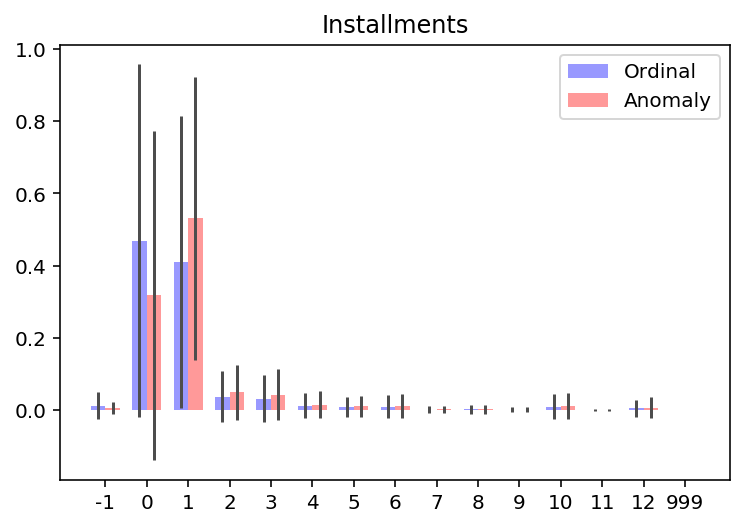

In [3]:
import re

installments_cols = list(filter(lambda x: "PERCENT_TRUE" in x and "installments_" in x, feature_matrix_df.columns))

n_groups = len(installments_cols)

means_ordinal = ordinal_df[installments_cols].mean(axis=0).values
stds_ordinal  = ordinal_df[installments_cols].std(axis=0).values

means_anomaly = anomaly_df[installments_cols].mean(axis=0).values
stds_anomaly  = anomaly_df[installments_cols].std(axis=0).values

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {"ecolor": "0.3"}

rects1 = ax.bar(index, means_ordinal, bar_width,
                alpha=opacity, color="b",
                yerr=stds_ordinal, error_kw=error_config,
                label="Ordinal")

rects2 = ax.bar(index + bar_width, means_anomaly, bar_width,
                alpha=opacity, color="r",
                yerr=stds_anomaly, error_kw=error_config,
                label="Anomaly")

ax.set_title("Installments")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(map(lambda x: re.search("(\-?\d+)", x).group(1), installments_cols)))
ax.legend()

plt.show()